# Traveling Salesman Problem

## Model Initialization

In [1]:
# import Glop linear solver package
from ortools.linear_solver import pywraplp as glp
import csv
import pandas as pd
# initialize model object
mymodel = glp.Solver('Traveling Salesman', glp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

## Parameters

In [2]:
# import cost matrix as data frame
#cost = [[ 0.0,  5.0, 15.0, 10.0], # cost from node 0
#        [ 5.0,  0.0, 12.0, 20.0],  # node 1
#        [15.0, 12.0,  0.0,  6.0],  # node 2
#        [10.0, 20.0,  6.0,  0.0]]  # node 3

In [ ]:
# Set filepath for CSV with cost / distance data
filepath = 'Orders_Data_TSP.csv'

In [20]:
# import csv distance matrix as list
with open(filepath, newline='') as f:
    reader = csv.reader(f)
    cost = list(reader)

# remove blanks & converting to integers
for i in range(len(cost)):
    cost[i] = [float(item) for item in cost[i] if item]
cost = [item for item in cost if item]

In [21]:
cost

[[0.0, 100.0, 81.0, 99.0, 61.0, 111.0, 16.0, 76.0, 67.0, 84.0, 102.0],
 [100.0, 0.0, 97.0, 98.0, 41.0, 93.0, 97.0, 92.0, 48.0, 51.0, 9.0],
 [81.0, 97.0, 0.0, 19.0, 66.0, 36.0, 66.0, 6.0, 51.0, 47.0, 92.0],
 [99.0, 98.0, 19.0, 0.0, 74.0, 18.0, 84.0, 23.0, 58.0, 47.0, 92.0],
 [61.0, 41.0, 66.0, 74.0, 0.0, 77.0, 56.0, 61.0, 17.0, 34.0, 42.0],
 [111.0, 93.0, 36.0, 18.0, 77.0, 0.0, 97.0, 38.0, 60.0, 45.0, 86.0],
 [16.0, 97.0, 66.0, 84.0, 56.0, 97.0, 0.0, 60.0, 59.0, 73.0, 98.0],
 [76.0, 92.0, 6.0, 23.0, 61.0, 38.0, 60.0, 0.0, 46.0, 43.0, 88.0],
 [67.0, 48.0, 51.0, 58.0, 17.0, 60.0, 59.0, 46.0, 0.0, 18.0, 45.0],
 [84.0, 51.0, 47.0, 47.0, 34.0, 45.0, 73.0, 43.0, 18.0, 0.0, 45.0],
 [102.0, 9.0, 92.0, 92.0, 42.0, 86.0, 98.0, 88.0, 45.0, 45.0, 0.0]]

In [5]:
# model parameters
N = len(cost) # number of nodes in data frame (including the dummy node)
M = N + 1000.0 # arbitrarily large number

## Decision Variables

In [6]:
use_arc = [list(range(1 + N * i, 1 + N * (i+1))) for i in range(N)] 
for i in range(N):
    for j in range(N):
        use_arc[i][j] = mymodel.IntVar(0, 1, str(i) + "." + str(j))
use_arc

[[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.10],
 [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 1.10],
 [2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 2.10],
 [3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 3.10],
 [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 4.10],
 [5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 5.10],
 [6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 6.10],
 [7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 7.10],
 [8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 8.10],
 [9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 9.10],
 [10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 10.10]]

In [7]:
# create position variable (lambda / u)
pos = list(range(N))
pos[0] = mymodel.IntVar(0, 0, 'p_0')
for i in range(1,N):
    pos[i] = mymodel.IntVar(1, N-1, "p_" + str(i))
pos

[p_0, p_1, p_2, p_3, p_4, p_5, p_6, p_7, p_8, p_9, p_10]

## Objective

In [8]:
# create objective function
shortest_route = mymodel.Objective()
shortest_route.SetMinimization()
for i in range(N):
    for j in range(N):
        shortest_route.SetCoefficient(use_arc[i][j], cost[i][j])

## Constraints

### Arc constraints

In [9]:
# Flow Out

Flow_out = list(range(N))

for i in range(N): 
    Flow_out[i] = mymodel.Constraint(1, 1)
    for j in range(N):
        if i != j: Flow_out[i].SetCoefficient(use_arc[i][j], 1)
        
# Flow In

Flow_in = list(range(N))

for i in range(N):
    Flow_in[i] = mymodel.Constraint(1, 1)
    for j in range(N): 
        if i!= j: Flow_in[i].SetCoefficient(use_arc[j][i], 1)

### Position Constraints

In [10]:
MTZ = [list(range(1 + N * i, 1 + N * (i+1))) for i in range(N)] 

for i in range(1,N):
    for j in range(1,N):
        MTZ[i][j] = mymodel.Constraint(-mymodel.infinity(), N-2)
        MTZ[i][j].SetCoefficient(use_arc[i][j], N-1)
        MTZ[i][j].SetCoefficient(pos[i], 1)
        MTZ[i][j].SetCoefficient(pos[j], -1)

### Solve

In [11]:
# Solve the model and print optimal solution
status = mymodel.Solve()                 # solve mymodel and display the solution

print('Solution Status =', status)
print('Number of variables =', mymodel.NumVariables())
print('Number of constraints =', mymodel.NumConstraints())

print('Optimal Solution:')

# The objective value of the solution.
print('Optimal Value = %.2f' % shortest_route.Value())

# Display optimal solution
#for i in range(N):
#    print('pos[%d] = %d' % (i, pos[i].solution_value()))
#    for j in range(N):
 #       print('From ', i, ' to ', j, ': ', use_arc[i][j].solution_value(), sep = '')

Solution Status = 0
Number of variables = 132
Number of constraints = 122
Optimal Solution:
Optimal Value = 338.00


In [12]:
Position = []
From = []
To = []

for i in range(N):
    Position.append(int(pos[i].solution_value() + 1))
    for j in range(N):
        if use_arc[i][j].solution_value() == 1:
            From.append(i)
            To.append(j)
solution = pd.DataFrame(list(zip(Position, From, To)), columns = ['Position', 'From', 'To'])
solution = solution.sort_values('Position').reset_index(drop=True)
solution

,Position,From,To
0,1,0,6
1,2,6,7
2,3,7,2
3,4,2,3
4,5,3,5
5,6,5,9
6,7,9,8
7,8,8,10
8,9,10,1
9,10,1,4


## Plot the Solution

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [14]:
# import csv x, y coord matrix as list
with open('XYcoord.csv', newline='') as f:
    reader = csv.reader(f)
    coord = list(reader)

# remove blanks & converting to integers
for i in range(len(coord)):
    coord[i] = [int(item) for item in coord[i] if item]
coord = [item for item in coord if item]


In [15]:
# Define function to convert list of coordinates to dictionary
def to_dict(my_list):
    dict = {}
    for items in range(len(my_list)):
        dict[items] = my_list[items]
    return dict

In [16]:
coord = to_dict(coord)

In [17]:
# Define edge list
edge_list = []
for i in range(len(solution)):
    edge_list.append([solution['From'][i], solution['To'][i]])

In [18]:
# Initialize graph object
G = nx.Graph()

C:\Users\camco\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


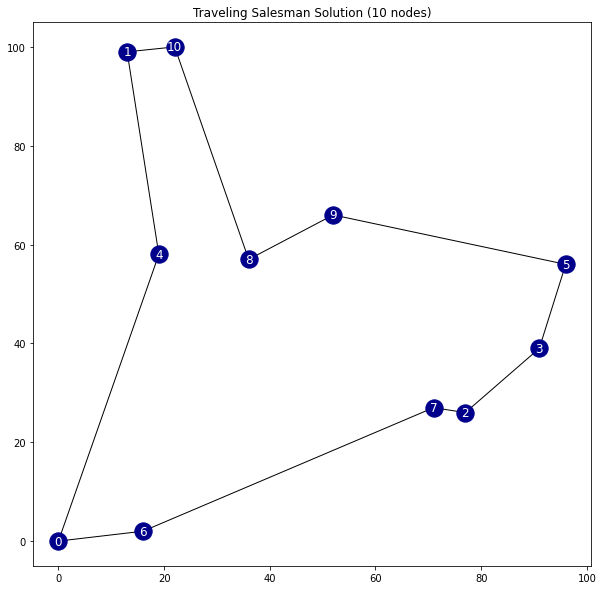

In [19]:
for (u,v) in edge_list:
    G.add_edge(v, u, capacity=1) 
       
fig, ax = plt.subplots(figsize=(10,10))
nx.draw(G, coord, edgelist=edge_list, edge_labels=True, with_labels=True, font_color='w', node_color='darkblue', ax=ax)
#nx.draw_networkx_edges(G, coord, edgelist=droneedgelist, edge_color='darkorange', style='dotted', ax=ax)
limits=plt.axis('on')
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
string = 'Traveling Salesman Solution (' + str(N-1) + ' nodes)'
ax.set_title(string)
plt.show();
#plt.savefig("route-sim1-k1.png")